### Project Overview
- Your goal is to evaluate every stock in the s&P500, and Nasdaq Adj Close as well as the daily return
- You will look for companies who too a dip (Loss for the day) as  well as companies that have spiked for the today's close

## Project approach:
- Use pandas data reader to get all Adj Close data for each stock for the year 2020 
- Will import all securities form a past project that passed properly through pandas data reader 
- Add all of resuts to a data frame
- Calculate the Daily return for each stock as well as the volitility year to date
- group Dips and Spikes - Which are worthy of investing

In [1]:
import pandas as pd 
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import seaborn as sns

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
tickers = pd.read_csv("resources/passed_Tickers.csv", index_col='Unnamed: 0')

In [3]:
tickers = list(tickers["Tickers"].values)

## Fetching the data 
 - we need ot consider companies that myay no longer exist and or have failed 
 - We also need to store the failed companies for future use

In [4]:
data = pd.DataFrame()

In [5]:
failed = []
passed = []
for x in tickers:
    try:
        data[x] = web.DataReader(x, data_source= "yahoo", start = "2020-1-1")["Adj Close"]
        passed.append(x)
    except (IOError, KeyError):
        msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
        failed.append(x)

## Taking A Look at Arconic and the companies Coorelated Year to Date

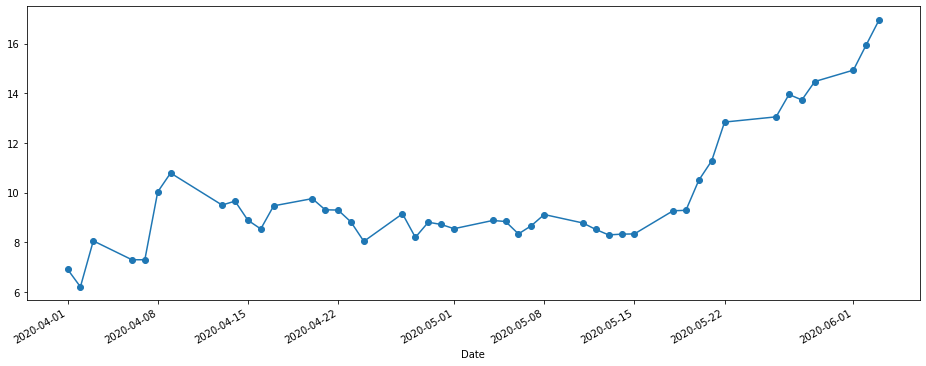

In [6]:
data["ARNC"].plot(figsize = (16,6), marker = "o")

### Passed Companies Passed 
- 471 companies passed the yahoo finance 

In [7]:
len(passed)

471

## Corr to Arconic
- Below are the top 20 companies coorelated to arconic 

In [8]:
data.corrwith(data["ARNC"]).sort_values(ascending = False).head(20)

ARNC    1.000000
RTN     1.000000
ALB     0.938382
PPG     0.917740
DLTR    0.911792
NKE     0.910646
GRMN    0.909179
MTD     0.907993
TDG     0.907605
F       0.897730
EL      0.897629
LB      0.896844
ETFC    0.895845
MS      0.894469
XRAY    0.894451
MCK     0.894255
GM      0.891463
CHRW    0.891170
DISH    0.883542
JBHT    0.883331
dtype: float64

## Daily Returns for each Stock
- We will focus on todays closing only to see which companies Dip or spikes

In [9]:
returns_df = pd.DataFrame()
for x in passed:
    data[f"{x} daily return"] = data[f"{x}"].pct_change()
    returns_df[f"{x} daily returns"] = data[f"{x}"].pct_change()

## Analysis of todays close - Spikes
- top 20 companies that had the highest daily returns at close

In [23]:
returns_df.transpose()["2020-06-03"].sort_values(ascending = False).head(20)

SPG daily returns     0.152719
BA daily returns      0.127495
MCHP daily returns    0.125258
MAC daily returns     0.123670
M daily returns       0.122126
HBI daily returns     0.121735
COTY daily returns    0.121718
KIM daily returns     0.121394
UAL daily returns     0.120695
GPS daily returns     0.118310
ADS daily returns     0.109347
FTI daily returns     0.107275
SLG daily returns     0.107120
PVH daily returns     0.105926
MGM daily returns     0.104714
WYNN daily returns    0.101902
DRI daily returns     0.100998
DXC daily returns     0.099319
VTR daily returns     0.098321
ALK daily returns     0.097362
Name: 2020-06-03 00:00:00, dtype: float64

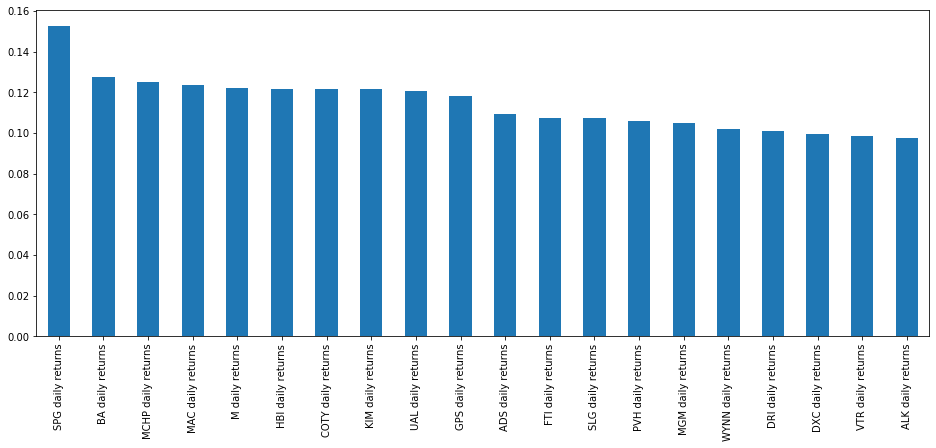

In [24]:
returns_df.transpose()["2020-06-03"].sort_values(ascending = False).head(20).plot(kind = 'bar', figsize = (16,6))

### Dips 
- top 20 companies that had the lowest daily returns fot todays close

In [26]:
returns_df.transpose()["2020-06-03"].sort_values(ascending = True).head(20)

NEM daily returns    -0.050584
CPB daily returns    -0.041723
ATVI daily returns   -0.040217
TSN daily returns    -0.040000
RRC daily returns    -0.035101
TTWO daily returns   -0.032021
EA daily returns     -0.028195
REGN daily returns   -0.027653
GIS daily returns    -0.026805
HUM daily returns    -0.026118
CTXS daily returns   -0.024397
VRTX daily returns   -0.022760
ILMN daily returns   -0.021623
AKAM daily returns   -0.021416
INCY daily returns   -0.021308
TIF daily returns    -0.020849
DGX daily returns    -0.020512
AMD daily returns    -0.018679
CAG daily returns    -0.017842
EQIX daily returns   -0.017806
Name: 2020-06-03 00:00:00, dtype: float64

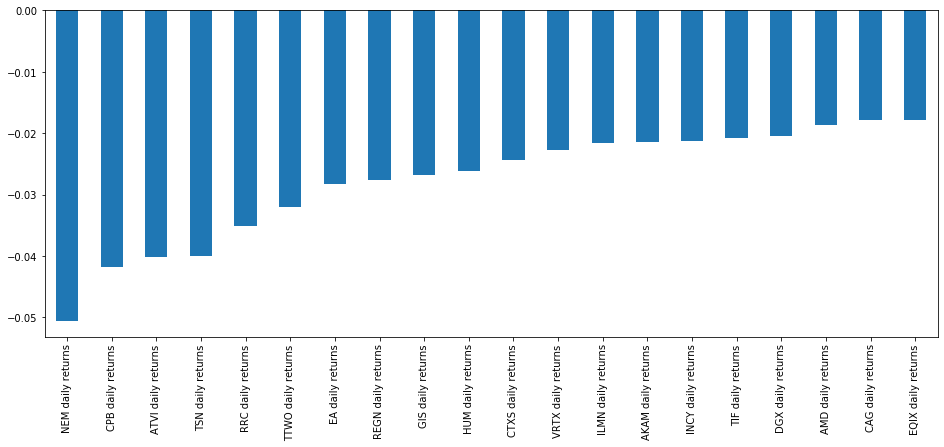

In [28]:
returns_df.transpose()["2020-06-03"].sort_values(ascending = True).head(20).plot(kind = "bar", figsize = (16,6))

# Nasdaq - Dips and Spikes

- Fetching Data
- we will repeat the same process for the Nasdaq

In [14]:
nasdaq = pd.DataFrame()

In [15]:
nasdaq_data = pd.read_excel("resources/nasdaq_100_stocks.xlsx")

In [16]:
nas_tickers = list(nasdaq_data["Ticker"].values)

In [17]:
nas_failed = []
nas_passed = []
for x in nas_tickers:
    try:
        nasdaq[x] = web.DataReader(x, data_source= "yahoo", start = "2020-1-1")["Adj Close"]
        nas_passed.append(x)
    except (IOError, KeyError):
        msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
        nas_failed.append(x)

## Daily Returns for Nasdaq

In [18]:
nas_returns = pd.DataFrame()
for x in nas_passed:
    nasdaq[f"{x} returns"] = nasdaq[f"{x}"].pct_change()
    nas_returns[f"{x} returns"] = nasdaq[f"{x}"].pct_change()

### Spikes
 - Top 20 companies with the higheest daily returns

In [29]:
nas_returns.transpose()["2020-06-03"].sort_values(ascending = False).head(20)

MCHP returns    0.124122
UAL returns     0.119358
WYNN returns    0.101308
NXPI returns    0.063085
FOXA returns    0.062799
LRCX returns    0.062680
FOX returns     0.057846
AAL returns     0.057041
CTAS returns    0.053490
EXPE returns    0.053313
MU returns      0.047950
SIRI returns    0.045987
ULTA returns    0.045933
KLAC returns    0.045519
MAR returns     0.045500
HAS returns     0.044872
ADI returns     0.043579
BIDU returns    0.043365
BKNG returns    0.042568
NTAP returns    0.038967
Name: 2020-06-03 00:00:00, dtype: float64

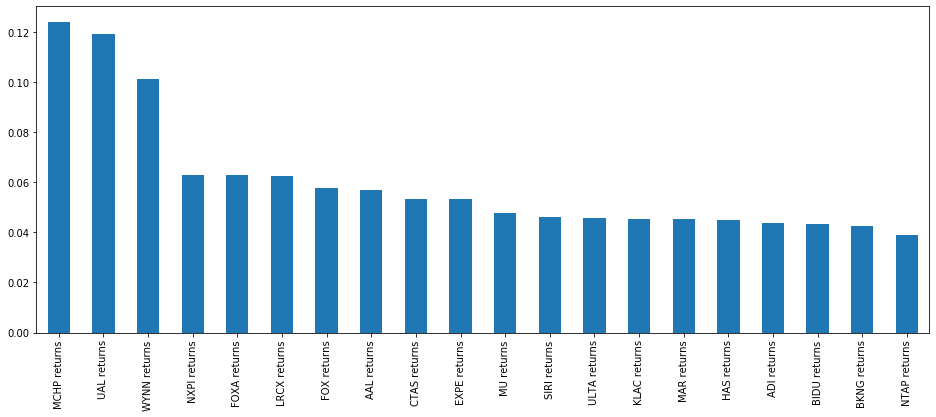

In [30]:
nas_returns.transpose()["2020-06-03"].sort_values(ascending = False).head(20).plot(kind = "bar", figsize = (16,6))

## Dips
- top 20 companies with the lowest daily returns for today

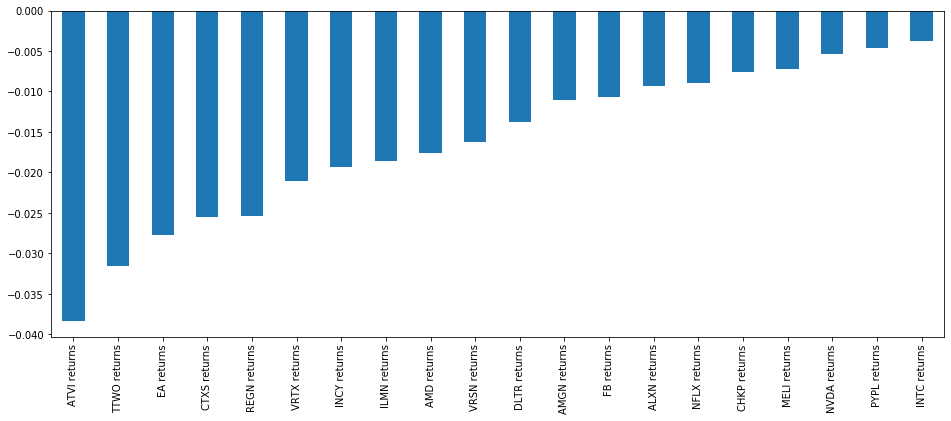

In [31]:
nas_returns.transpose()["2020-06-03"].sort_values(ascending = True).head(20).plot(kind = "bar", figsize = (16,6))

In [32]:
nas_returns.transpose()["2020-06-03"].sort_values(ascending = True).head(20)

ATVI returns   -0.038367
TTWO returns   -0.031575
EA returns     -0.027705
CTXS returns   -0.025509
REGN returns   -0.025329
VRTX returns   -0.021071
INCY returns   -0.019326
ILMN returns   -0.018631
AMD returns    -0.017650
VRSN returns   -0.016284
DLTR returns   -0.013817
AMGN returns   -0.011085
FB returns     -0.010743
ALXN returns   -0.009374
NFLX returns   -0.008916
CHKP returns   -0.007586
MELI returns   -0.007165
NVDA returns   -0.005411
PYPL returns   -0.004572
INTC returns   -0.003783
Name: 2020-06-03 00:00:00, dtype: float64